In [219]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [220]:
df = pd.read_csv('Resources/postgres.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [221]:
target = df["stroke"]
target_names = ["condition", "stroke"]

In [222]:
data = df.drop(["stroke","gender","ever_married","work_type","Residence_type","smoking_status"], axis=1)
feature_names = data.columns
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,80.0,0,1,105.92,32.5
2,49.0,0,0,171.23,34.4
3,79.0,1,0,174.12,24.0
4,81.0,0,0,186.21,29.0


In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [224]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [225]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.949


In [226]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   condition       0.95      1.00      0.97      1164
      stroke       0.00      0.00      0.00        63

    accuracy                           0.95      1227
   macro avg       0.47      0.50      0.49      1227
weighted avg       0.90      0.95      0.92      1227



C:\Users\marcus garnham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcus garnham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcus garnham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [227]:
# Support vector machine poly classifier
from sklearn.svm import SVC 
model = SVC(kernel='poly')
model.fit(X_train, y_train)

SVC(kernel='poly')

In [228]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.949


In [229]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   condition       0.95      1.00      0.97      1164
      stroke       0.00      0.00      0.00        63

    accuracy                           0.95      1227
   macro avg       0.47      0.50      0.49      1227
weighted avg       0.90      0.95      0.92      1227



C:\Users\marcus garnham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcus garnham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcus garnham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [230]:
# Support vector machine sigmoid classifier
from sklearn.svm import SVC 
model = SVC(kernel='sigmoid')
model.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [231]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.948


In [232]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   condition       0.95      1.00      0.97      1164
      stroke       0.00      0.00      0.00        63

    accuracy                           0.95      1227
   macro avg       0.47      0.50      0.49      1227
weighted avg       0.90      0.95      0.92      1227



# undersampling 

In [233]:
strokes = len(df[df['stroke'] == 1])
print(strokes)

209


In [234]:
df_strokes = df[df['stroke'] == 1 ]
df_strokes

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
204,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
205,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
206,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
207,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


In [235]:
#no_strokes = df[df.stroke == 0].index
#print(no_strokes)
no_strokes = df[df['stroke'] == 0 ]
no_strokes

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
209,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
210,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
211,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
212,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
213,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4903,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4904,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4905,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4906,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [236]:
no_strokes_2 = no_strokes.sample(n=strokes*4, replace=False)
no_strokes_2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4858,Female,49.0,0,0,Yes,Govt_job,Urban,69.92,47.6,never smoked,0
4799,Female,40.0,0,0,Yes,Private,Urban,93.97,23.6,never smoked,0
986,Female,79.0,0,0,Yes,Govt_job,Urban,93.89,30.4,never smoked,0
3294,Male,62.0,0,0,Yes,Private,Rural,60.39,26.9,Unknown,0
3442,Female,36.0,0,0,Yes,Private,Rural,71.32,43.9,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
2434,Female,28.0,0,0,Yes,Private,Rural,94.15,23.1,smokes,0
1963,Female,66.0,0,0,Yes,Private,Urban,202.05,31.7,smokes,0
4758,Female,81.0,0,0,No,Self-employed,Urban,57.42,33.7,never smoked,0
1070,Female,47.0,0,0,Yes,Private,Rural,195.04,45.5,never smoked,0


In [237]:
Undersample_concat = pd.concat([no_strokes_2, df_strokes])
Undersample_concat

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4858,Female,49.0,0,0,Yes,Govt_job,Urban,69.92,47.6,never smoked,0
4799,Female,40.0,0,0,Yes,Private,Urban,93.97,23.6,never smoked,0
986,Female,79.0,0,0,Yes,Govt_job,Urban,93.89,30.4,never smoked,0
3294,Male,62.0,0,0,Yes,Private,Rural,60.39,26.9,Unknown,0
3442,Female,36.0,0,0,Yes,Private,Rural,71.32,43.9,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
204,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
205,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
206,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
207,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


In [238]:
target2 = Undersample_concat["stroke"]
target_names2 = ["condition", "stroke"]

In [239]:
data2 = Undersample_concat.drop(["stroke","gender","ever_married","work_type","Residence_type","smoking_status"], axis=1)
feature_names2 = data2.columns
data2

,age,hypertension,heart_disease,avg_glucose_level,bmi
4858,49.0,0,0,69.92,47.6
4799,40.0,0,0,93.97,23.6
986,79.0,0,0,93.89,30.4
3294,62.0,0,0,60.39,26.9
3442,36.0,0,0,71.32,43.9
...,...,...,...,...,...
204,68.0,1,1,247.51,40.5
205,57.0,0,0,84.96,36.7
206,14.0,0,0,57.93,30.9
207,75.0,0,0,78.80,29.3


In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data2, target2, random_state=42)

In [241]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [242]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.798


In [243]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   condition       0.84      0.93      0.88       214
      stroke       0.40      0.21      0.27        48

    accuracy                           0.80       262
   macro avg       0.62      0.57      0.58       262
weighted avg       0.76      0.80      0.77       262



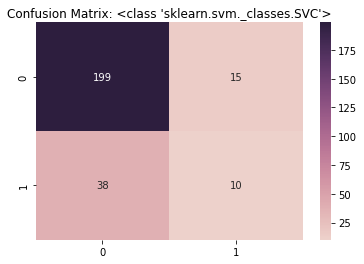

In [244]:
#testing
cf_matrix = confusion_matrix(y_test, model.predict(X_test))
plt.title('Confusion Matrix: {}'.format(SVC))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()
#dont reduce to much
#printed format with 4 numbers
#confusion matrix for training and end result

In [245]:
y_true = y_test
y_pred = model.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[199,  15],
       [ 38,  10]], dtype=int64)

In [246]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")
print('true negative', tn, '\n',
      'false positive', fp, '\n',
      'false negative', fn, '\n',
      'true positive', tp, '\n')

Accuracy: 0.7977099236641222
true negative 199 
 false positive 15 
 false negative 38 
 true positive 10 



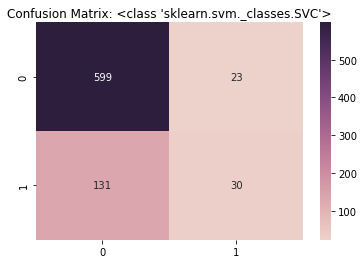

In [247]:
#training
cf_matrix = confusion_matrix(y_train, model.predict(X_train))
plt.title('Confusion Matrix: {}'.format(SVC))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()

In [248]:
y_true = y_train
y_pred = model.predict(X_train)
confusion_matrix(y_true, y_pred)

array([[599,  23],
       [131,  30]], dtype=int64)

In [249]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")
print('true negative', tn, '\n',
      'false positive', fp, '\n',
      'false negative', fn, '\n',
      'true positive', tp, '\n')

Accuracy: 0.8033205619412516
true negative 599 
 false positive 23 
 false negative 131 
 true positive 30 



In [250]:
# Support vector machine poly classifier
from sklearn.svm import SVC 
model = SVC(kernel='poly', probability=True)
model.fit(X_train, y_train)
THRESHOLD = 0.15
preds = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [251]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.844


In [252]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   condition       0.86      0.96      0.91       214
      stroke       0.65      0.31      0.42        48

    accuracy                           0.84       262
   macro avg       0.76      0.64      0.67       262
weighted avg       0.82      0.84      0.82       262



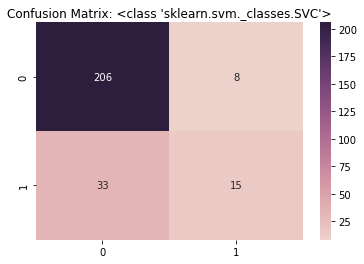

In [253]:
#testing
cf_matrix = confusion_matrix(y_test, model.predict(X_test))
plt.title('Confusion Matrix: {}'.format(SVC))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()

In [254]:
y_true = y_test
y_pred = model.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[206,   8],
       [ 33,  15]], dtype=int64)

In [255]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")
print('true negative', tn, '\n',
      'false positive', fp, '\n',
      'false negative', fn, '\n',
      'true positive', tp, '\n')

Accuracy: 0.8435114503816794
true negative 206 
 false positive 8 
 false negative 33 
 true positive 15 



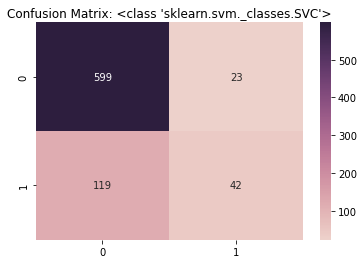

In [256]:
#training
cf_matrix = confusion_matrix(y_train, model.predict(X_train))
plt.title('Confusion Matrix: {}'.format(SVC))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()

In [257]:
y_true = y_train
y_pred = model.predict(X_train)
confusion_matrix(y_true, y_pred)

array([[599,  23],
       [119,  42]], dtype=int64)

In [258]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")
print('true negative', tn, '\n',
      'false positive', fp, '\n',
      'false negative', fn, '\n',
      'true positive', tp, '\n')

Accuracy: 0.8186462324393359
true negative 599 
 false positive 23 
 false negative 119 
 true positive 42 



In [259]:
# Support vector machine sigmoid classifier
from sklearn.svm import SVC 
model = SVC(kernel='sigmoid')
model.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [260]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.721


In [261]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   condition       0.81      0.87      0.84       214
      stroke       0.10      0.06      0.08        48

    accuracy                           0.72       262
   macro avg       0.45      0.47      0.46       262
weighted avg       0.68      0.72      0.70       262



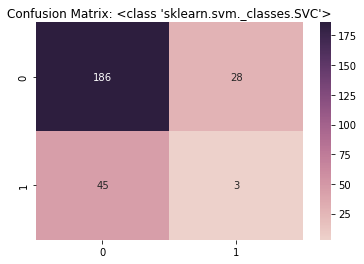

In [262]:
#testing
cf_matrix = confusion_matrix(y_test, model.predict(X_test))
plt.title('Confusion Matrix: {}'.format(SVC))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()